<a href="https://colab.research.google.com/github/jsgovea/PyTorch-learning/blob/main/cnn_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader, sampler
import torchvision.datasets as datasets
import torchvision.transforms as T
import matplotlib.pyplot as plt


In [3]:
DATA_PATH = '/content/cifar-10'
NUM_TRAIN = 50000
NUM_VAL = 5000
NUM_TEST = 5000
MINBATCH_SIZE = 64

transform_cifar = T.Compose([
    T.ToTensor(),
    T.Normalize([0.491, 0.482, 0.447], [0.247, 0.243, 0.261])
])

In [4]:
# Train dataset

# Download the dataset
cifar10_train = datasets.CIFAR10(DATA_PATH, train=True, download=True,
                                 transform=transform_cifar)

train_loader = DataLoader(cifar10_train, batch_size=MINBATCH_SIZE,
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))

cifar10_val = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                              transform=transform_cifar)

val_loader = DataLoader(cifar10_val, batch_size=MINBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL)))

cifar10_test = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                                transform=transform_cifar)

test_loader = DataLoader(cifar10_test, batch_size=MINBATCH_SIZE,
                         sampler=sampler.SubsetRandomSampler(range(NUM_VAL, len(cifar10_test))))



100%|██████████| 170498071/170498071 [00:02<00:00, 67732191.14it/s]


Extracting /content/cifar-10/cifar-10-python.tar.gz to /content/cifar-10
Files already downloaded and verified
Files already downloaded and verified


In [5]:
test_loader.dataset

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: /content/cifar-10
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.491, 0.482, 0.447], std=[0.247, 0.243, 0.261])
           )

## Check the GPUs

In [6]:
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')
print(device)

cpu


## Show images

The current image represents a: horse


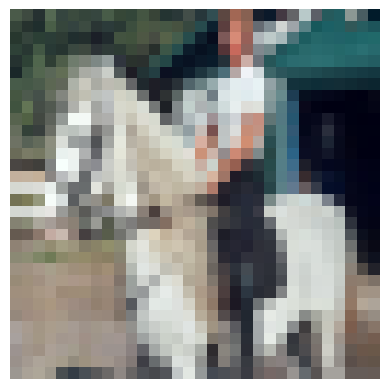

In [10]:
classes = test_loader.dataset.classes
def plot_figure(image):
  plt.imshow(np.transpose(image, (1, 2, 0)))
  plt.axis('off')
  plt.show()

rnd_sample_idx = np.random.randint(len(test_loader))
print(f"The current image represents a: {classes[test_loader.dataset[rnd_sample_idx][1]]}")
image = test_loader.dataset[rnd_sample_idx][0]
image = (image - image.min()) / (image.max() - image.min())
plot_figure(image)

In [8]:
def plot_cifar10_grid():
  classes = test_loader.dataset.classes
  total_samples = 8
  plt.figure(figsize=(15, 15))
  for label, sample in enumerate(classes):
    class_idxs = np.flatnonzero(label == np.array(test_loader.dataset.targets))
    sample_idxs = np.random.choice(class_idxs, total_samples, replace=False)
    for i, idx in enumerate(sample_idxs):
      plt_idx = i * len(classes) * label + 1
      plt.subplot(total_samples, len(classes), plt_idx)
      plt.imshow(test_loader.dataset.data[idx])
      plt.axis('off')

      if i == 0: plt.title(sample)
  plt.show()
plot_cifar10_grid


<function __main__.plot_cifar10_grid()>

## Calculate accuracy